#  17장 - 새로운 데이터 합성을 위한 생성적 적대 신경망 (part 1)

In [1]:
from IPython.display import Image

# 생성적 적대 신경망 소개

**생성적 적대 신경망**(Generative Adversarial Network, GAN)의 주요한 모적은 훈련 데이터셋과 동일한 분포를 가진 새로운 데이터를 합성하는 것이다. 따라서 GAN의 원본 형태는 레이블 데이터가 필요하지 않으므로 머신 러닝 작업 중 비지도 학습 범주로 간주된다. 하지만 원본 GAN을 확장하는 것은 비지도 학습과 지도 학습 양쪽으로 모두 볼 수 있다.  

일반적인 GAN 개념은 이안 굿펠로우와 동료들이 심층 신경망을 사용하여 새로운 이미지를 합성하는 방법으로 2014년 처음 발표했다. 이 논문에서 제안한 초기 GAN 구조는 다층 퍼셉트론과 비슷한 완전 연결 층을 기반으로 하여 낮은 해상도의 MNIST 손글씨 숫자를 생성하도록 훈련했다.  

처음 소개된 이후 원저자는 물론 많은 연구자가 헤아릴 수 없을 정도로 많은 개선 버전을 제시했고 공학과 과학의 여러 분야에서 다양한 애플리케이션을 만들었다. 예를 들어 컴퓨터 비전에서는 이미지-투-이미지 변환(image-to-image translation)(입력 이미지에서 출력 이미지로 매핑하는 방법을 학습), 이미지 초해상도(image super-resolution)(낮은 해상도의 이미지를 높은 해상도의 이미지로 변환), 이미지 인페이팅(iamge inpainting)(이미지에서 누락된 부분을 재구성하는 방법을 학습) 등 많은 애플리케이션에서 GAN을 사용한다. 

## 오토인코더

GAN의 동작 방식을 설명하기 전에 먼저 훈련 데이터를 압축하고 해제할 수 있는 오토인코더(autoencoder)를 다루어 보자.  

오토인코더는 **인코더**(encoder) 신경망과 **디코더**(decoder) 신경망 두 개가 연결되어 구성된다.  
인코더 신경망은 샘플 x에 연관된 d차원의 입력 특성 벡터를 받아 p차원의 벡터 z로 인코딩한다. 다른 말로 하면 인코더는 $z=f(x)$ 함수를 모델링하는 방법을 배우는 역할을 한다.  
인코딩된 벡터 z를 **잠재 벡터**(latent vector) 또는 잠재 특성 표현이라고 부른다. 일반적으로 잠재 벡터의 차원은 입력 샘플의 차원보다 작다. 따라서 인코더가 데이터 압축 기능을 한다고 말할 수 있다. 그다음 디코더는 저차원 잠재 벡터 z에서 $\hat{x}$를 압축해제한다. 디코더를 함수 $\hat{x}=g(z)$로 생각할 수 있다. 

In [2]:
Image(url='https://git.io/JLAQ2', width=500)

위의 그림은 인코더와 디코더 사이에 은닉층이 없는 오토인코더이지만 비선형성을 가진 여러 은닉층을 추가하여 심층 오토인코더를 만들 수 있다. 이렇게 하면 더욱 효과적인 데이터 압축과 재구성 함수를 학습할 수 있다.

## 새로운 데이터 합성을 위한 생성 모델

오토인코더는 결정적인 모델이다. 즉, 오토인코더가 훈련되고 나면 입력 x에 대해 저차원 공간의 압축된 버전에서 이 입력을 재구성할 수 있다. 따라서 압축된 표현을 변환하는 식으로 입력을 재구성하는 것을 넘어서 새로운 데이터를 생성할 수 없다.  

반면 생성 모델은 (잠재 표현에 해당하는) 랜덤한 벡터 z에서 새로운 샘플 $\tilde{x}$를 생성할 수 있다. 생성 모델을 그림으로 표현하면 아개오 ㅏ같다. 

In [3]:
Image(url='https://git.io/JLAQH', width=700)

오토인코더에서 생성 모델로 시선을 옮기면 오토인코더의 디코더가 생성 모델과 비슷하다는 것을 눈치챌 수 있다. 둘 다 잠재 벡터 z를 입력으로 받고 x와 동일한 공간에 있는 출력을 만든다.  

이 두 모델의 큰 차이점은 오토인코더에 있는 z의 분포는 알지 못하지만 생성 모델에서는 z의 분포를 완벽하게 알고 있다는 것이다. 오토인코더를 생성 모델로 일반화할 수도 있다. VAE가 그중 한 가지 방법이다.  

VAE 외에도 자기회귀 모델(autoregressive model)과 노멀라이징 플로 모델(normalizing flow model)과 같은 다른 종류의 생성 모델이 있다.

## GAN으로 새로운 샘플 생성

GAN이 하는 일의 핵슴을 이해하기 위해 알려진 분포에서 샘플링한 랜덤 벡터 z를 입력받아 출력 이미지 x를 생성하는 신경망을 가정해 보자. 이 신경망을 생성자(generator)(G)라고 부르며 $\hat{x}=G(z)$는 생성된 출력이다. 얼굴 이미지, 빌딩 이미지, 동물 이미지, MNIST 같은 솔글씨 숫자 이미지를 생성하는 것이 목적이라고 가정해보자.  

신경망을 랜덤한 가중치로 초기화한다. 따라서 가중치가 학습되기 전에 출력한 이미지는 백색 소음과 비슷할 것이다. 이미지의 품질을 평가하는 함수가 있다고 가정해 본다.  

이런 함수에서 피드백을 받아 생성된 이미지의 품질을 높이기 위해 가중치를 수정하도록 생성자 신경망에 알려 줄 수 있다. 그리고 이런 식으로 평가 함수의 피드백을 기반으로 생성자를 훈련시킬 수 있다. 생성자는 출력을 개선하여 진짜 이미지처럼 보이도록 학습될 것이다.  

앞의 문단에서 언급한 평가 함수가 이미지 생성 작업을 매우 쉽게 만들 수 있지만 이미지 품질을 평가하는 범용적인 함수가 있는지, 있다면 어떻게 정의할 수 있는지가 관건이다. 사람은 신경망의 출력을 보고 이미지 품질을 쉽게 평가할 수 있다. 하지만 뇌에서 만든 결과를 신경망으로 역전파할 수 없다. 만약 사람의 뇌가 합성 이미지의 품질을 평가할 수 있다면 비슷한 일을 하는 신경망 모델을 만들 수 있을까? 이것이 바로 GAN의 아이디어이다.  

아래 그림에 있듯이 GAN 모델은 **판별자**(discriminator)(D)라고 불리는 또 다른 신경망으로 구성되어 있다. 판별자는 진짜 이미지 x에서 합성 이미지 $\hat{x}$를 감지하는 법을 학습하는 분류기이다.

In [4]:
Image(url='https://git.io/JLAQ7', width=700)

GAN에서 생성자와 판별자 두 신경망이 함께 훈련된다. 먼저 모델 가중치를 초기화한 후 생성자가 진짜처럼 보이지 않은 이미지를 만든다. 비슷하게 판별자는 진짜 이미지와 생성자가 합성한 가짜 이미지를 구분하는 능력이 형편없다. 하지만 시간이 지남에 따라 두 시경망이 서로 상호 작용을 하면서 향상된다. 두 신경망은 적대적인 게임(adversarial game)을 수행한다. 생성자는 판별자를 속이기 위해 출력을 향상시키도록 학습한다. 동시에 판별자는 합성 이미지를 더 잘 감지하도록 훈련된다.

## GAN의 생성자와 판별자 손실 함수 이해

원본 논문에 나와 았는 GAN의 목적 함수는 다음과 같다.  
$$V(\theta^{(D)}, \theta^{(G)})=E_{x~p_{data}(x)}[logD(x)]+E_{z~p_{z}(z)}\left[ log(1-D(G(z))) \right]$$  

여기서 $V(\theta^{(D)}, \theta^{(G)})$를 가치 함수(value function)라고 부른다. 이를 보상으로 생각할 수 있다. 판별자(D)에 대해 이 값을 최대화하고 생성자(G)에 대해서는 이 값을 최소화해야 한다.  
$D(x)$는 입력 샘플 x가 진짜인지 가짜(즉, 생성된 것인지)인지 나타내는 확률이다.  
$E_{x~p_{data}(x)}[logD(x)]$는 데이터 분포(진짜 샘플의 분포)에서 온 샘플에 대한 대괄호 안에 있는 식의 기댓값을 나타낸다. $E_{z~p_{z}(z)}\left[ log(1-D(G(z))) \right]$는 입력 벡터 z에 대한 대괄호 안에 있는 식의 기댓값을 나타낸다.  

이런 가치 함수를 사용한 GAN 모델의 훈련은 두 개의 최적화 단계가 필요하다.  
(1) 판별자에 대한 보상을 최대화하고 (2) 생성자에 대한 보상을 최소화한다. 실용적인 GAN 훈련 방법은 두 최적화 단계를 교대로 수행하는 것이다.  
(1) 한 신경망의 가중치를 고정하고 다른 신경망의 가중치를 최적화한다. (2) 두 번째 신경망을 고정하고 첫 번째 신경망을 최적화한다.  
훈련 반복마다 이 과정을 반복한다. 생성자 신경망을 고정하고 판별자를 최적화한다고 가정해 보자. 가치 함수 $V(\theta^{(D)}, \theta^{(G)})$의 두 항이 모두 판별자를 최적화하는 데 기여한다. 따라서 G를 고정하면 $V(\theta^{(D)}, \theta^{(G)})$를 최대화하는 것이 목적 함수가 된다. 즉, 판별자가 진짜와 가짜 이미지를 더 잘 구분하도록 만드는 것이다.  

진짜와 가짜 샘플 에 대한 손실을 사용하여 판별자를 최적화한 후 판별자를 고정하고 생성자를 최적화한다. 이 경우 $V(\theta^{(D)}, \theta^{(G)})$에 있는 두 번째 항만 생성자의 그레이디언트에 기여한다. 결국 D르 고정할 때 $V(\theta^{(D)}, \theta^{(G)})$를 최소화하는 목적 함수는 $\underset{G}min E_{z~p_{z}(z)}\left[ log(1-D(G(z))) \right]$로 쓸 수 있다.  

이렇게 식을 바꾸는 것은 생성자 훈련에서 진짜와 가짜 샘플의 이미지를 뒤바꾸고 일반적인 함수 최솟값을 찾는 작업을 수행하는 것을 의미한다. 다른 말로 하면 생성자가 합성한 샘플이 가짜라서 레이블이 0이더라도 이 샘플의 레이블을 1로 바꾼다. 그다음 $\underset{G}min E_{z~p_{z}(z)}\left[ log(1-D(G(z))) \right]$를 최대화하는 대신 새로운 레이블로 이진 크로스 엔트로피 손실을 최소화할 수 있다.  

GAN 훈련을 위한 일반적인 최적화 과정을 소개했다. GAN을 훈련할 때 사용할 수 있는 데이터 레이블을 살펴보자. 판별자가 이진 분류기이면 이진 크로스 엔트로피 손실 함수를 사용할 수 있다. 따라서 판별자 손실을 위한 정답 레이블을 다음과 같이 결정할 수 있다.  
$$판별자를 위한 정답 레이블 = \begin{cases} 1:\ 진짜\ 이미지일 때,\ 즉x \\ 0:\ 생성자의\ 출력일\ 때,\ 즉G(z) \end{cases}$$  

생성자를 훈련하기 위핸 레이블은 무엇일까? 생성자는 진짜 같은 이미지를 합성해야 하기 때문에 판별자가 생성자의 출력 을 분류하지 않으면 생성자에게 벌칙을 부여할 수 있다. 생성자의 손실 함수를 계산할 때 생성자의 출력에 대한 레이블로 1로 가정한다는 의미이다.  

이를 모두 합치면 간단한 GAN 모델에 있는 각 단계를 아래 그림과 같이 나타낼 수 있다. 

In [5]:
Image(url='https://git.io/JLAQF', width=800)

# 밑바닥부터 GAN 모델 구현

In [6]:
import tensorflow as tf
print(tf.__version__)

print("GPU 여부:", len(tf.config.list_physical_devices('GPU')) > 0)

if tf.config.list_physical_devices('GPU'):
    device_name = tf.test.gpu_device_name()
else:
    device_name = 'cpu:0'
    
print(device_name)

2.9.2
GPU 여부: True
/device:GPU:0


## 생성자와 판별자 신경망 구현

첫 번째 GAN 모델의 생성자와 판별자를 한 개 또는 그 이상의 은닉층을 가진 연결 신경망으로 구현해 보자.  
이 모델이 원본 GAN 버전이며 바닐라(vanila) GAN이라고 부른다.  

이 모델의 각 은닉층에는 LeakyRelu 활성화 함수를 사용한다. 렐루(ReLU)를 사용하면 희소한 그레이디언트가 발생하기 때문에 입력 값 전 범위에 걸쳐 그레이디언트가 필요할 때는 적합하지 않기 때문이다.  
판별자 신경망에서 각 은닉층 다음에는 드롭아웃 층이 뒤따른다. 생성자의 출력층은 하이퍼볼릭 탄젠트(tanh) 활성화 함수를 사용한다.  

판별자의 출력층은 로짓을 계산하기 위해 활성화 함수를 가지지 않는다.(즉, 선형 활성화 함수를 사용한다.) 아니면 확률을 출력으로 얻기 위해 시그모이드 활성화 함수를 사용할 수 있다. 

In [7]:
Image(url='https://git.io/JLAQp', width=600)

In [8]:
# LeakyReLU 활성화 함수
Image(url='https://git.io/JLAQh', width=600)

In [9]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [10]:
## 생성자 함수를 정의합니다:
def make_generator_network(
        num_hidden_layers=1,
        num_hidden_units=100,
        num_output_units=784):
    model = tf.keras.Sequential()
    for i in range(num_hidden_layers):
        model.add(
            tf.keras.layers.Dense(
                units=num_hidden_units, 
                use_bias=False)
            )
        model.add(tf.keras.layers.LeakyReLU())
        
    model.add(tf.keras.layers.Dense(
        units=num_output_units, activation='tanh'))
    return model

## 판별자 함수를 정의합니다:
def make_discriminator_network(
        num_hidden_layers=1,
        num_hidden_units=100,
        num_output_units=1):
    model = tf.keras.Sequential()
    for i in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(units=num_hidden_units))
        model.add(tf.keras.layers.LeakyReLU())
        model.add(tf.keras.layers.Dropout(rate=0.5))
        
    model.add(
        tf.keras.layers.Dense(
            units=num_output_units, 
            activation=None)
        )
    return model

In [11]:
image_size = (28, 28)
z_size = 20
mode_z = 'uniform'  # 'uniform' vs. 'normal'
gen_hidden_layers = 1
gen_hidden_size = 100
disc_hidden_layers = 1
disc_hidden_size = 100

tf.random.set_seed(1)

gen_model = make_generator_network(
    num_hidden_layers=gen_hidden_layers, 
    num_hidden_units=gen_hidden_size,
    num_output_units=np.prod(image_size))

gen_model.build(input_shape=(None, z_size))
gen_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2000      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 784)               79184     
                                                                 
Total params: 81,184
Trainable params: 81,184
Non-trainable params: 0
_________________________________________________________________


In [12]:
disc_model = make_discriminator_network(
    num_hidden_layers=disc_hidden_layers,
    num_hidden_units=disc_hidden_size)

disc_model.build(input_shape=(None, np.prod(image_size)))
disc_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 78,601
Trainable params: 78,601
Non-trainable params: 0
_________________________________________________________________


## 훈련 데이터셋 정의

그다음 단계로 MNIST 데이터셋을 로드하고 필요한 전처리 단계를 적용한다. 생성자의 출력층이 tanh 활성화 함수를 사용하기 때문에 합성된 이미지가 갖는 픽셀 값의 범위는 (-1, 1)이다.  
하지만 입력되는 MNIST 이미지 픽셀의 범위는 [0, 255]이다. 따라서 전처리 단계에서 `tf.image.conver_image_dtype` 함수를 사용해서 입력 이미지 텐서의 `dtype`을 `tf.unit8`에서 `tf.float32`로 바꾼다.  
여기에다 2를 곱하고 1을 빼서 픽셀 강도를 [-1, 1]범위로 조정한다. 또한, 랜덤한 분포를 기반으로 랜덤 벡터 z를 만든다. 그다음 전처리된 이미지와 랜덤 벡터를 튜플로 반환한다. 

In [13]:
mnist_bldr = tfds.builder('mnist')
mnist_bldr.download_and_prepare()
mnist = mnist_bldr.as_dataset(shuffle_files=False)

def preprocess(ex, mode='uniform'):
    image = ex['image']
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.reshape(image, [-1])
    image = image*2 - 1.0
    if mode == 'uniform':
        input_z = tf.random.uniform(
            shape=(z_size,), minval=-1.0, maxval=1.0)
    elif mode == 'normal':
        input_z = tf.random.normal(shape=(z_size,))
    return input_z, image



mnist_trainset = mnist['train']

print('전처리 전:  ')
example = next(iter(mnist_trainset))['image']
print('dtype: ', example.dtype, ' 최소: {} 최대: {}'.format(np.min(example), np.max(example)))

mnist_trainset = mnist_trainset.map(preprocess)

print('전처리 후:  ')
example = next(iter(mnist_trainset))[0]
print('dtype: ', example.dtype, ' 최소: {} 최대: {}'.format(np.min(example), np.max(example)))

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
전처리 전:  
dtype:  <dtype: 'uint8'>  최소: 0 최대: 255
전처리 후:  
dtype:  <dtype: 'float32'>  최소: -0.8737728595733643 최대: 0.9460210800170898


여기서는 편의상 모델을 훈련할 때 이벽 벡터 z와 훈련 데이터에서 추출한 이미지를 함께 반환했다. 하지만 이것이 벡터 z가 데이터셋에 있는 입력 이미지와 조금이라도 관련 있다는 의미는 아니다. 훈련 반복마다 랜덤하게 생성된 벡터 z는 생성자가 새로운 이미지를 위해 받는 입력이다. 그리고 (진짜 이미지와 합성된 이미지를 포함한) 이미지는 판별자의 입력이다.  

앞서 만든 데이터셋 객체를 조사해보자. 다음 코드에서 한 개의 배치를 추출하여 입력 벡터와 이미지 배열의 크기를 출력해보자. 또한, GAN 모델의 전체 데이터 흐름을 이해하기 위해 생성자와 판별자의 정방향 계산을 실행해본다.  

먼저 입력 벡터 z의 배치를 생성자에 준비하여 출력 `g_output`을 얻늗나. 이는 가짜 샘플의 배치이다. 이 배치를 판별자 모델에 주입하여 가짜 샘플의 배치 로짓인 `d_logits_fake`를 얻는다. 또한, 데이터셋 객체에서 가져온 전처리된 이미지를 판별자 모델에 주입하여 진짜 이미지에 대한 로짓 `d_logits_real`을 얻는다. 

In [14]:
mnist_trainset = mnist_trainset.batch(32, drop_remainder=True)
input_z, input_real = next(iter(mnist_trainset))
print('input-z -- 크기:', input_z.shape)
print('input-real -- 크기:', input_real.shape)

g_output = gen_model(input_z)
print('생성자 출력 -- 크기:', g_output.shape)

d_logits_real = disc_model(input_real)
d_logits_fake = disc_model(g_output)
print('판별자 (진짜) -- 크기:', d_logits_real.shape)
print('판별자 (가짜) -- 크기:', d_logits_fake.shape)

input-z -- 크기: (32, 20)
input-real -- 크기: (32, 784)
생성자 출력 -- 크기: (32, 784)
판별자 (진짜) -- 크기: (32, 1)
판별자 (가짜) -- 크기: (32, 1)


## GAN 모델 훈련하기

다음 단계로 손실 함수를 위해 BinaryCrossentropy 클래스 객체를 만들어 앞서 처리한 배치에 대해 생성자와 판별자의 손실을 계산한다. 이를 위해 각 출력에 대한 정답 레이블이 필요하다. 생성자를 위해서는 1로 채워진 벡터를 만든다. 이 벡터의 크기는 생성된 이미지의 로짓 값을 다음 `d_logits_fake`와 크기가 같다. 판별자는 두 개의 손실이 필요하다. `d_logits_fake`를 사용하여 가짜 샘플을 감지하는 손실을 계산하고 `d_logits_fake`를 기반으로 진짜 샘플을 감지하는 손실을 계산한다.  

가짜 샘플을 위한 정답 레이블은 0으로 채워진 벡터로 `tf.zeros()` 함수를 사용하여 만들 수 있다. 비슷하게 진짜 이미지를 위한 정답으로 `tf.ones()` 함수를 사용하여 1로 채워진 벡터를 만들 수 있다. 

In [15]:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

## 생성자 손실
g_labels_real = tf.ones_like(d_logits_fake)
g_loss = loss_fn(y_true=g_labels_real, y_pred=d_logits_fake)
print('생성자 손실: {:.4f}'.format(g_loss))

## 판별자 손실
d_labels_real = tf.ones_like(d_logits_real)
d_labels_fake = tf.zeros_like(d_logits_fake)

d_loss_real = loss_fn(y_true=d_labels_real, y_pred=d_logits_real)
d_loss_fake = loss_fn(y_true=d_labels_fake, y_pred=d_logits_fake)
print('판별자 손실: 진짜 {:.4f} 가짜 {:.4f}'
      .format(d_loss_real.numpy(), d_loss_fake.numpy()))

생성자 손실: 0.7355
판별자 손실: 진짜 1.5073 가짜 0.6583


앞의 코드는 GAN 모델 훈련의 전반적인 개념을 이해하기 위해 여러 손실 항을 단계별로 계산하고 있다. 다음 코드에서 GAN 모델을 만들고 훈련 반복을 위해 for 반복문 안에서 이런 계산을 수행한다.  

또한, `tf.GradientTape()`로 모델의 가중치에 대한 손실의 그레이디언트를 계산하고 두 개의 `Adam` 옵티마이저를 사용하여 생성자와 판별자의 파라미터를 최적화한다. 

In [16]:
import time


num_epochs = 100
batch_size = 64
image_size = (28, 28)
z_size = 20
mode_z = 'uniform'
gen_hidden_layers = 1
gen_hidden_size = 100
disc_hidden_layers = 1
disc_hidden_size = 100

tf.random.set_seed(1)
np.random.seed(1)


if mode_z == 'uniform':
    fixed_z = tf.random.uniform(
        shape=(batch_size, z_size),
        minval=-1, maxval=1)
elif mode_z == 'normal':
    fixed_z = tf.random.normal(
        shape=(batch_size, z_size))


def create_samples(g_model, input_z):
    g_output = g_model(input_z, training=False)
    images = tf.reshape(g_output, (batch_size, *image_size))    
    return (images+1)/2.0

## 데이터셋 준비
mnist_trainset = mnist['train']
mnist_trainset = mnist_trainset.map(
    lambda ex: preprocess(ex, mode=mode_z))

mnist_trainset = mnist_trainset.shuffle(10000)
mnist_trainset = mnist_trainset.batch(
    batch_size, drop_remainder=True)

## 모델 준비
with tf.device(device_name):
    gen_model = make_generator_network(
        num_hidden_layers=gen_hidden_layers, 
        num_hidden_units=gen_hidden_size,
        num_output_units=np.prod(image_size))
    gen_model.build(input_shape=(None, z_size))

    disc_model = make_discriminator_network(
        num_hidden_layers=disc_hidden_layers,
        num_hidden_units=disc_hidden_size)
    disc_model.build(input_shape=(None, np.prod(image_size)))

## 손실 함수와 옵티마이저:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
g_optimizer = tf.keras.optimizers.Adam()
d_optimizer = tf.keras.optimizers.Adam()

all_losses = []
all_d_vals = []
epoch_samples = []

start_time = time.time()
for epoch in range(1, num_epochs+1):
    epoch_losses, epoch_d_vals = [], []
    for i,(input_z,input_real) in enumerate(mnist_trainset):
        
        ## 생성자 손실을 계산합니다
        with tf.GradientTape() as g_tape:
            g_output = gen_model(input_z)
            d_logits_fake = disc_model(g_output, training=True)
            labels_real = tf.ones_like(d_logits_fake)
            g_loss = loss_fn(y_true=labels_real, y_pred=d_logits_fake)
            
        # g_loss의 그래디언트를 계산합니다
        g_grads = g_tape.gradient(g_loss, gen_model.trainable_variables)
        
        # 최적화: 그래디언트를 적용합니다
        g_optimizer.apply_gradients(
            grads_and_vars=zip(g_grads, gen_model.trainable_variables))

        ## 판별자 손실을 계산합니다
        with tf.GradientTape() as d_tape:
            d_logits_real = disc_model(input_real, training=True)

            d_labels_real = tf.ones_like(d_logits_real)
            
            d_loss_real = loss_fn(
                y_true=d_labels_real, y_pred=d_logits_real)

            d_logits_fake = disc_model(g_output, training=True)
            d_labels_fake = tf.zeros_like(d_logits_fake)

            d_loss_fake = loss_fn(
                y_true=d_labels_fake, y_pred=d_logits_fake)

            d_loss = d_loss_real + d_loss_fake

        ## d_loss의 그래디언트를 계산합니다
        d_grads = d_tape.gradient(d_loss, disc_model.trainable_variables)
        
        ## 최적화: 그래디언트를 적용합니다
        d_optimizer.apply_gradients(
            grads_and_vars=zip(d_grads, disc_model.trainable_variables))
                           
        epoch_losses.append(
            (g_loss.numpy(), d_loss.numpy(), 
             d_loss_real.numpy(), d_loss_fake.numpy()))
        
        d_probs_real = tf.reduce_mean(tf.sigmoid(d_logits_real))
        d_probs_fake = tf.reduce_mean(tf.sigmoid(d_logits_fake))
        epoch_d_vals.append((d_probs_real.numpy(), d_probs_fake.numpy()))        
    all_losses.append(epoch_losses)
    all_d_vals.append(epoch_d_vals)
    print(
        '에포크 {:03d} | 시간 {:.2f} min | 평균 손실 >>'
        ' 생성자/판별자 {:.4f}/{:.4f} [판별자-진짜: {:.4f} 판별자-가짜: {:.4f}]'
        .format(
            epoch, (time.time() - start_time)/60, 
            *list(np.mean(all_losses[-1], axis=0))))
    epoch_samples.append(
        create_samples(gen_model, fixed_z).numpy())

에포크 001 | 시간 0.57 min | 평균 손실 >> 생성자/판별자 2.8670/0.2894 [판별자-진짜: 0.0333 판별자-가짜: 0.2561]
에포크 002 | 시간 1.04 min | 평균 손실 >> 생성자/판별자 5.0030/0.3734 [판별자-진짜: 0.1273 판별자-가짜: 0.2462]
에포크 003 | 시간 1.49 min | 평균 손실 >> 생성자/판별자 3.0516/0.7085 [판별자-진짜: 0.3195 판별자-가짜: 0.3890]
에포크 004 | 시간 1.94 min | 평균 손실 >> 생성자/판별자 2.3761/0.8107 [판별자-진짜: 0.4130 판별자-가짜: 0.3977]
에포크 005 | 시간 2.39 min | 평균 손실 >> 생성자/판별자 2.0038/0.8417 [판별자-진짜: 0.4586 판별자-가짜: 0.3830]
에포크 006 | 시간 2.85 min | 평균 손실 >> 생성자/판별자 1.7317/0.9378 [판별자-진짜: 0.5080 판별자-가짜: 0.4298]
에포크 007 | 시간 3.30 min | 평균 손실 >> 생성자/판별자 1.5495/0.9861 [판별자-진짜: 0.5373 판별자-가짜: 0.4488]
에포크 008 | 시간 3.76 min | 평균 손실 >> 생성자/판별자 1.5361/0.9750 [판별자-진짜: 0.5345 판별자-가짜: 0.4405]
에포크 009 | 시간 4.21 min | 평균 손실 >> 생성자/판별자 1.4378/1.0447 [판별자-진짜: 0.5621 판별자-가짜: 0.4827]
에포크 010 | 시간 4.67 min | 평균 손실 >> 생성자/판별자 1.3343/1.0815 [판별자-진짜: 0.5819 판별자-가짜: 0.4996]
에포크 011 | 시간 5.12 min | 평균 손실 >> 생성자/판별자 1.3191/1.0910 [판별자-진짜: 0.5827 판별자-가짜: 0.5084]
에포크 012 | 시간 5.58 min | 평균 손실 >> 생성자/판별자 1.

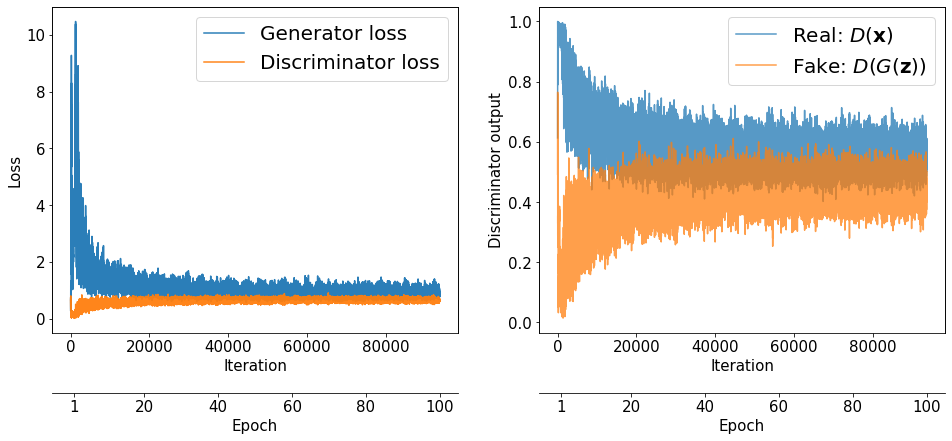

In [17]:
import itertools


fig = plt.figure(figsize=(16, 6))

## 손실 그래프
ax = fig.add_subplot(1, 2, 1)
g_losses = [item[0] for item in itertools.chain(*all_losses)]
d_losses = [item[1]/2.0 for item in itertools.chain(*all_losses)]
plt.plot(g_losses, label='Generator loss', alpha=0.95)
plt.plot(d_losses, label='Discriminator loss', alpha=0.95)
plt.legend(fontsize=20)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Loss', size=15)

epochs = np.arange(1, 101)
epoch2iter = lambda e: e*len(all_losses[-1])
epoch_ticks = [1, 20, 40, 60, 80, 100]
newpos = [epoch2iter(e) for e in epoch_ticks]
ax2 = ax.twiny()
ax2.set_xticks(newpos)
ax2.set_xticklabels(epoch_ticks)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 60))
ax2.set_xlabel('Epoch', size=15)
ax2.set_xlim(ax.get_xlim())
ax.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

## 판별자의 출력
ax = fig.add_subplot(1, 2, 2)
d_vals_real = [item[0] for item in itertools.chain(*all_d_vals)]
d_vals_fake = [item[1] for item in itertools.chain(*all_d_vals)]
plt.plot(d_vals_real, alpha=0.75, label=r'Real: $D(\mathbf{x})$')
plt.plot(d_vals_fake, alpha=0.75, label=r'Fake: $D(G(\mathbf{z}))$')
plt.legend(fontsize=20)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Discriminator output', size=15)

ax2 = ax.twiny()
ax2.set_xticks(newpos)
ax2.set_xticklabels(epoch_ticks)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 60))
ax2.set_xlabel('Epoch', size=15)
ax2.set_xlim(ax.get_xlim())
ax.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

plt.show()

판별자 모델은 로짓을 출력하지만 이 그래프를 위해 배치의 평균을 계산하기 전에 시그모이드 함수로 계산한 확률을 저장했다.  

위의 그림에 있는 판별자 출력을 보면 알 수 있듯이 훈련 초기에는 판별자가 진짜와 가짜 샘플을 매우 정확하게 구별하는 법을 빠르게 배운다. 즉, 가짜 샘플의 확률이 0에 가깞다. 가짜 샘플이 전혀 진짜 샘플과 닮지 않았기 때문이다. 따라서 진짜와 가짜 샘플을 구별하는 일은 비교적 쉽다. 훈련이 진행되면서 생성자가 더 진짜 같은 이미지를 합성하게 되면 진짜와 가짜 샘플에 대한 확률이 모두 0.5에 가까워진다.  

훈련하는 동안 생성자의 출력, 즉 합성된 이미지가 어떻게 변하는지 확인해 볼 수 있다. 에포크가 끝날 때마다 `create_samples()`를 호출해서 몇 개의 샘플을 생성하고 파이썬 리스트에 저장했다. 

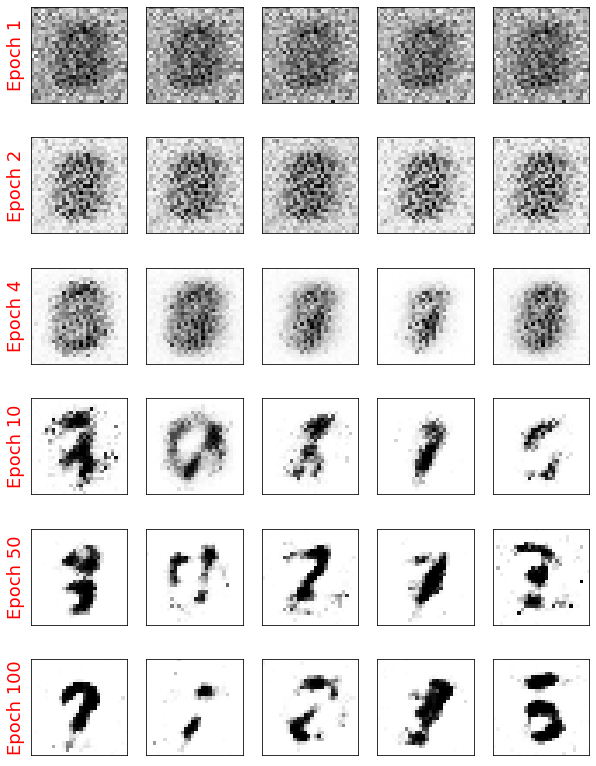

In [18]:
selected_epochs = [1, 2, 4, 10, 50, 100]
fig = plt.figure(figsize=(10, 14))
for i,e in enumerate(selected_epochs):
    for j in range(5):
        ax = fig.add_subplot(6, 5, i*5+j+1)
        ax.set_xticks([])
        ax.set_yticks([])
        if j == 0:
            ax.text(
                -0.06, 0.5, 'Epoch {}'.format(e),
                rotation=90, size=18, color='red',
                horizontalalignment='right',
                verticalalignment='center', 
                transform=ax.transAxes)
        
        image = epoch_samples[e-1][j]
        ax.imshow(image, cmap='gray_r')

plt.show()

위의 그림에서 볼 수 있듯이 생성자 신경망은 훈련이 진행될수록 더 실제 같은 이미지를 만든다. 하짐나 100번째 에포크에서 만들어진 이미지는 MNIST 데이터셋에 있는 손글씨 숫자와 매우 다르다.  